In [40]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('submission.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,15
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,1
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,10
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,1


In [42]:
label = 0
label_trsfm = {}

for m in range(3):
    for g in range(2):
        for a in range(3):
            label_trsfm[label] = ':'.join([str(m),str(g),str(a)])
            label += 1
            
# mask 0 1 2
# gender 0 1
# age 0 1 2
true_label = {
    'mask': ['Wear', 'Incorrect', 'Not Wear'],
    'gender': ['male', 'female'],
    'age': ['<30', '>=30 and <60', '>=60']
}

def get_label_verbosity(label):
    label = label_trsfm[label].split(':')
    label = list(map(int, label))
    mask = true_label['mask'][label[0]]
    gender = true_label['gender'][label[1]]
    age = true_label['age'][label[2]]
    res = f"{mask}\n{gender}\n{age}"
    return res

In [43]:
IMG_DIR = Path('eval/images')

[]

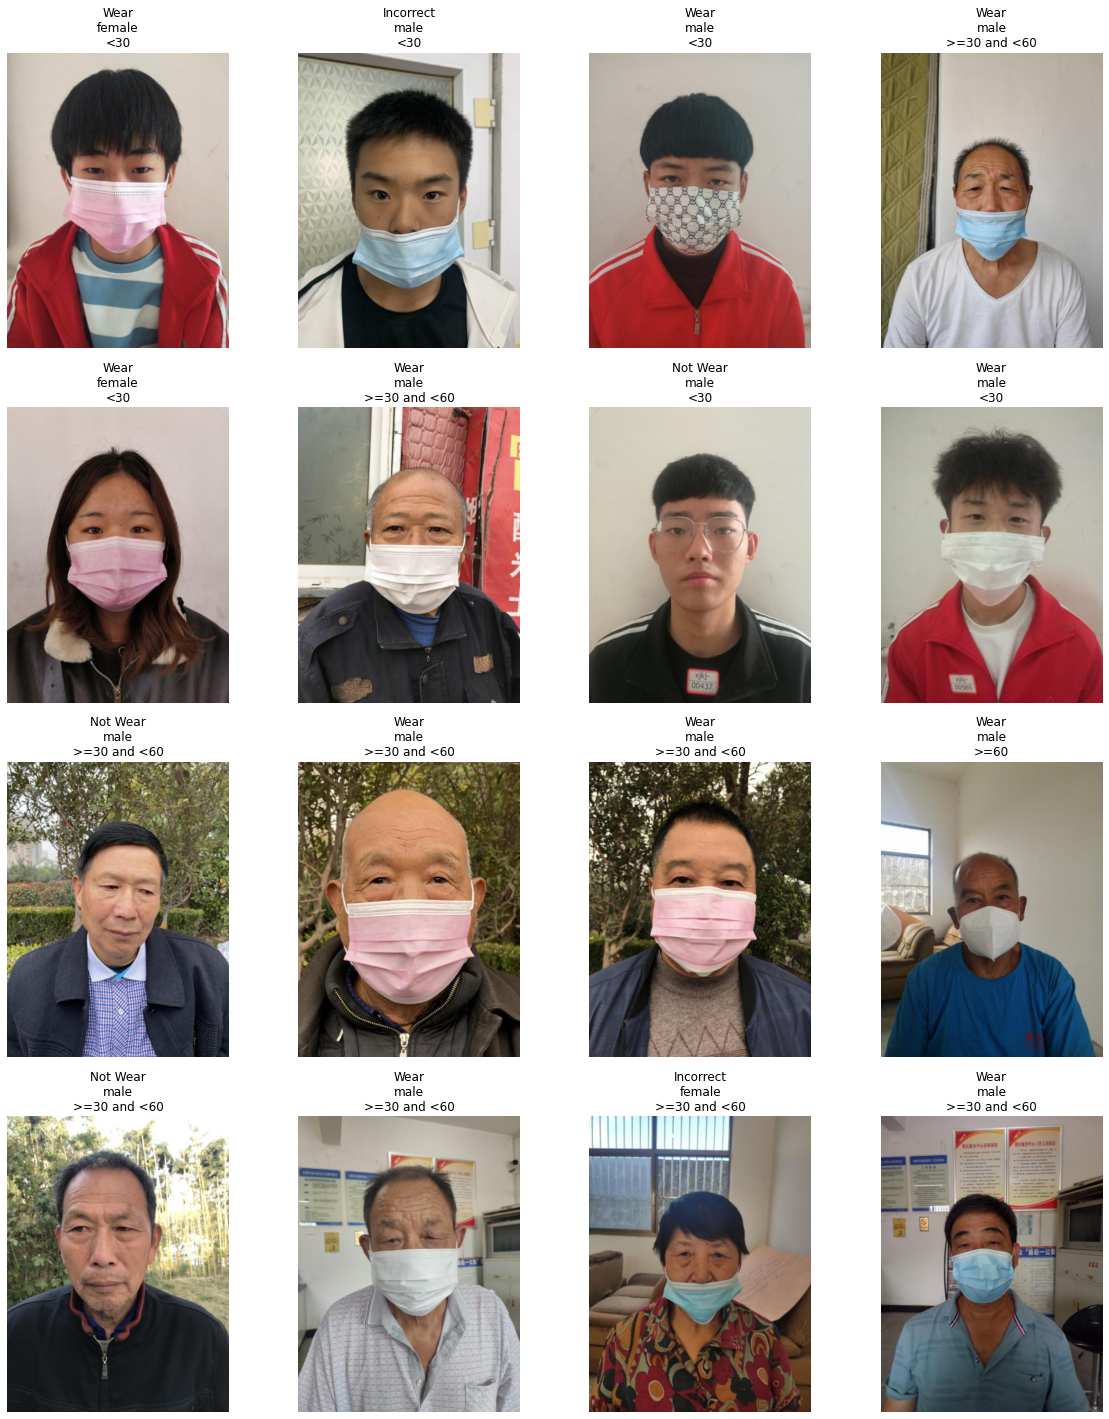

In [44]:
NUM_SHOW = 4
TOTAL = NUM_SHOW * NUM_SHOW

plt.figure(figsize=(20,25))

start_idx = np.random.randint(0,len(df) - TOTAL)
cnt = 1
for idx in range(start_idx, start_idx + TOTAL):
    img = Image.open(IMG_DIR / df.loc[idx, 'ImageID'])
    plt.subplot(NUM_SHOW, NUM_SHOW, cnt)
    plt.imshow(img)
    plt.title(get_label_verbosity(df.loc[idx, 'ans']))
    plt.axis('off')
    cnt += 1
    
plt.plot()